# Multithreading

It is one of the two way of achieving parallel programming (first one is Multiprocessing)

A thread is an entity within a process that can be scheduled for execution. Also, it is the smallest unit of processing that can be performed in an OS (operating system).

In simple words, a thread is a sequence of such instructions within a program that can be executed independently of other code. For simplicity, you can assume that a thread is simply a subset of a process!

----

Multiple threads can exist within one process where:
- Each thread contains its own register set and local variables (stored in stack).
  - PS: a register set is used for storing some intermediate values during a computation (temp values)  
- All thread of a process share global variables (stored in heap) and the program code.

Usually a program has single thread, but a program can have multiple threads.
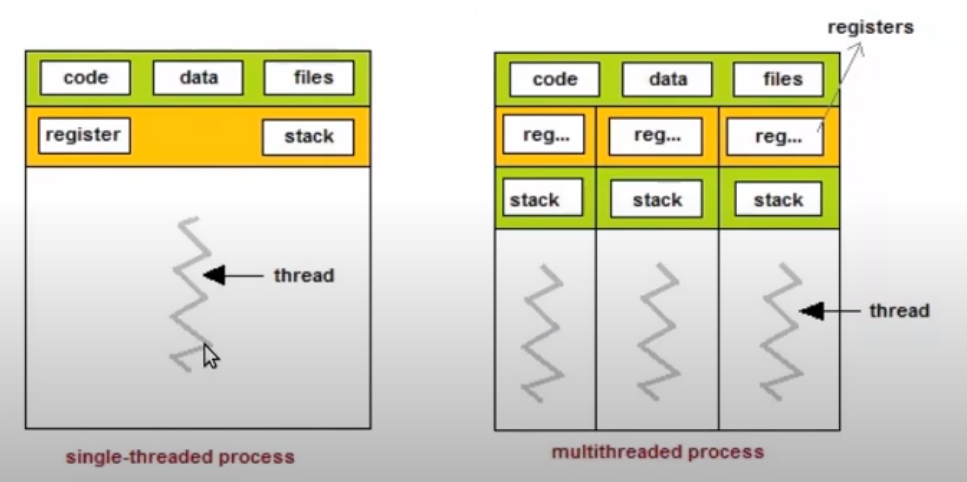

** Multithreading is defined as the ability of a processor to execute multiple threads concurrently.
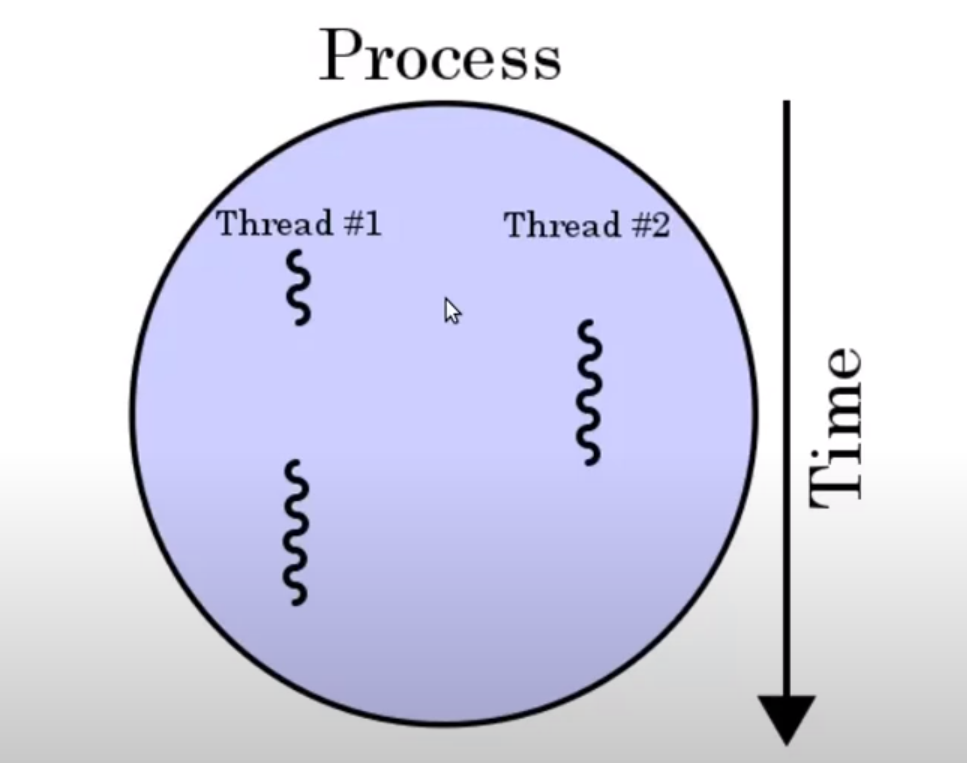

Now, the question is how can i do multi-threading.
So, basically there are two ways to do multi-threading.
  - First and most obvious way that we can think of, whenever you have multiple threads you can give each thread to each processor in your CPU. (this is something that cannot be done is python programming due to GIL (Global interpreter lock). It only allows your python program (python interpreter) can execute only one thread at a time. 
  - The second way to achive this is through fast `context switching`.
  - Basically, means you execute one thread then you stop and execute another thread then stop and come back to first thread and like-wise as show in the diagram above. (It provides an illusion that things are happening in parallel).

# Multithreading in Python

In [3]:
import os
import threading

def print_cube(num):
    print(threading.current_thread().name, os.getpid())
    print(f"Cube -> {num ** 3}")
    
def print_square(num):
    print(threading.current_thread().name, os.getpid())
    print(f"Square -> {num ** 2}")

In [6]:
t1 = threading.Thread(target=print_cube, args=(3,), name="TH1")
t2 = threading.Thread(target=print_square, args=(4,), name="TH2")

t1.start()
t2.start()

t1.join()
t2.join()

TH1 2500312
Cube -> 27
TH2 2500312
Square -> 16


As you can see from the example above, multiple process are not spawned (pid is same) because of the GIL (global interpreter lock). And it gives you the illusion that multi threading is happening

## Thread Synchronization

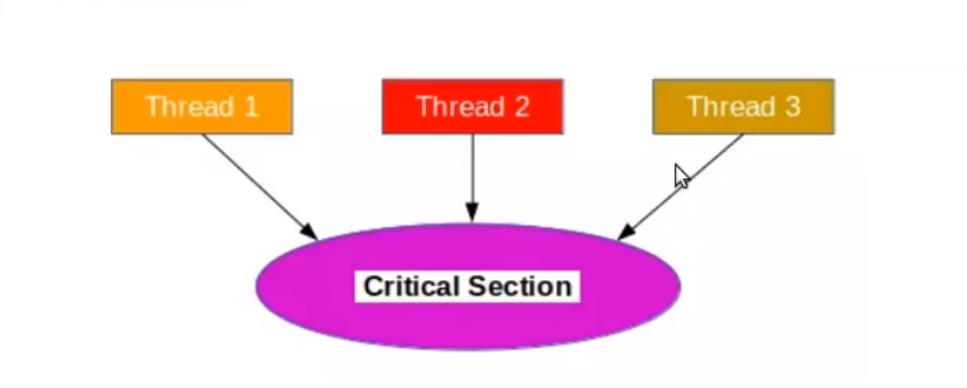

As we have seen in our process synchronization, same thing is applied here.
Thread sync is a mechanism that doesn't allow or prevents multile threads to be spawned as the same time in the critical section.

In the case of threads, shared data is global variables. And if multile threds try to access varialbe at the same time it may cause race conditions. 

In [9]:
# example of race condition in threading

import threading

x = 0

def increment():
    global x
    x += 1
    
def thread_task():
    for _ in range(100000):
        increment()
        
def main_task():
    global x
    
    x = 0
    
    t1 = threading.Thread(target=thread_task)
    t2 = threading.Thread(target=thread_task)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()
    

for i in range(10):
    main_task()
    print(f"Iteration: {i} :: x = {x}")

Iteration: 0 :: x = 200000
Iteration: 1 :: x = 200000
Iteration: 2 :: x = 200000
Iteration: 3 :: x = 200000
Iteration: 4 :: x = 200000
Iteration: 5 :: x = 200000
Iteration: 6 :: x = 200000
Iteration: 7 :: x = 200000
Iteration: 8 :: x = 200000
Iteration: 9 :: x = 200000


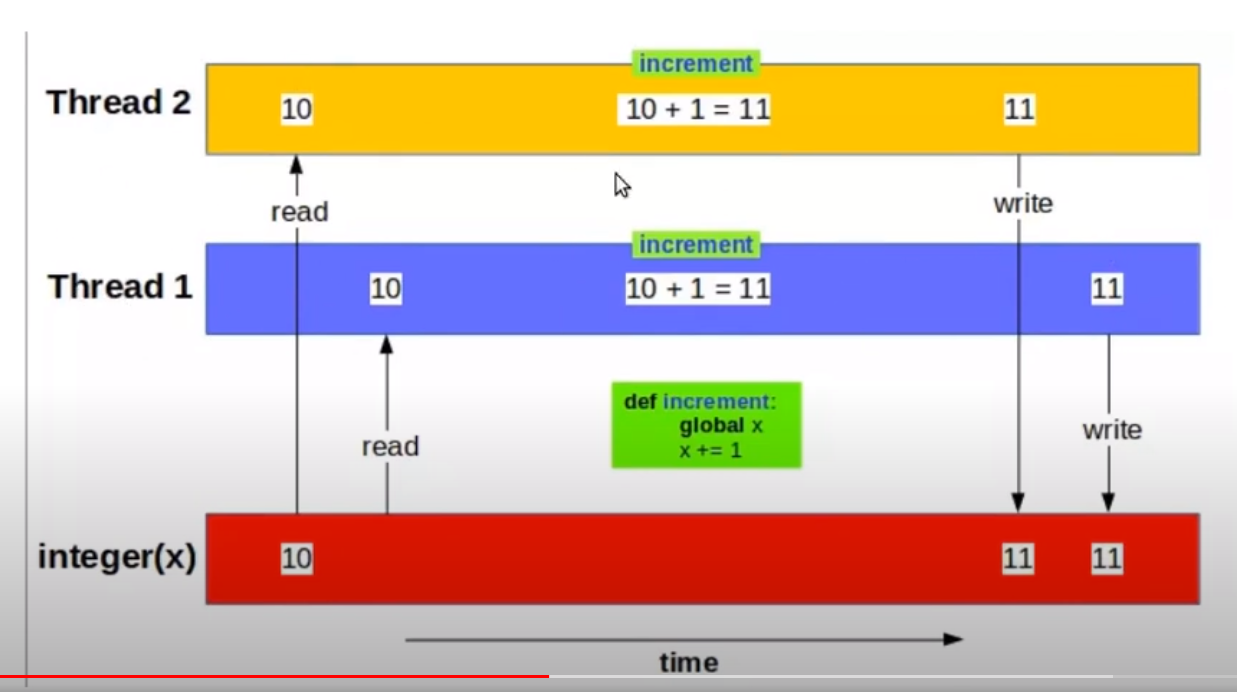

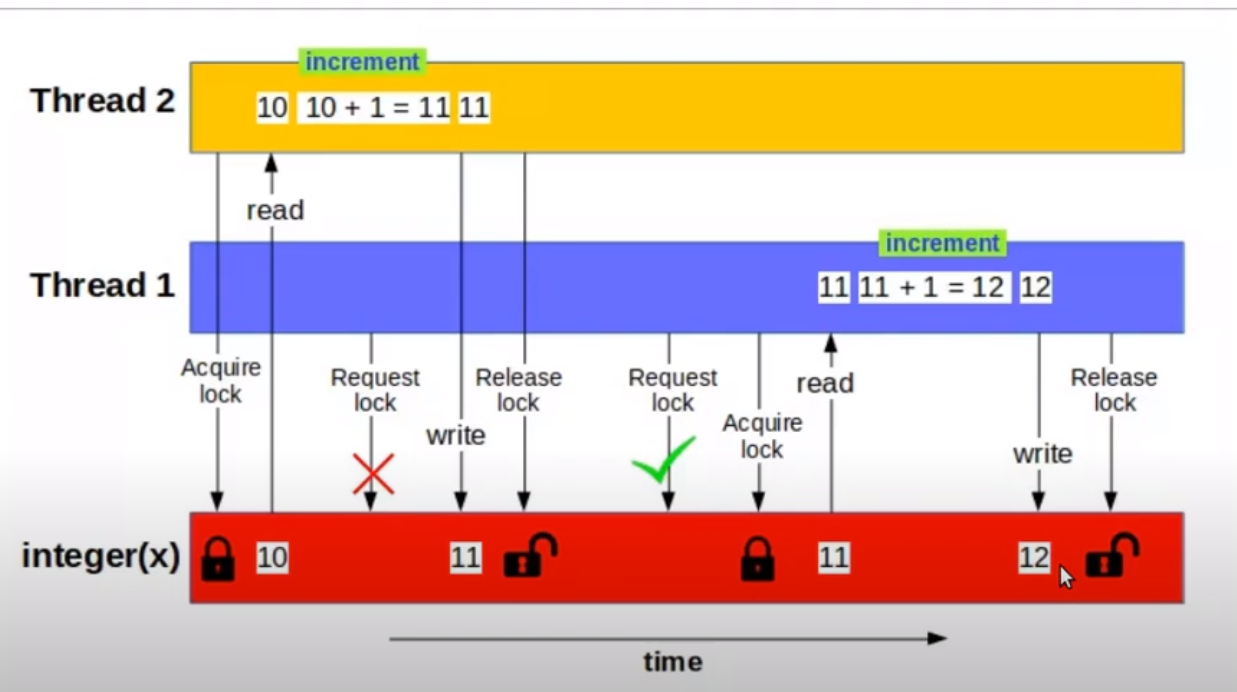

In [11]:
# thread with lock

import threading

x = 0

def increment():
    global x
    x += 1
    
def thread_task(lock):
    for _ in range(100000):
        lock.acquire()
        increment()
        lock.release()
        
def main_task():
    global x
    
    x = 0
    
    lock = threading.Lock()
    
    t1 = threading.Thread(target=thread_task, args=(lock,))
    t2 = threading.Thread(target=thread_task, args=(lock,))
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()
    

for i in range(10):
    main_task()
    print(f"Iteration: {i} :: x = {x}")

Iteration: 0 :: x = 200000
Iteration: 1 :: x = 200000
Iteration: 2 :: x = 200000
Iteration: 3 :: x = 200000
Iteration: 4 :: x = 200000
Iteration: 5 :: x = 200000
Iteration: 6 :: x = 200000
Iteration: 7 :: x = 200000
Iteration: 8 :: x = 200000
Iteration: 9 :: x = 200000
